In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
import sklearn.datasets 
from scipy.stats import skew
sns.set()

In [5]:
df = pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.shape

(4177, 9)

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

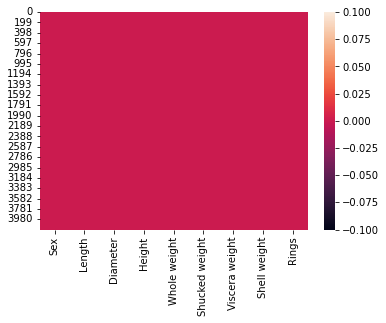

In [14]:
sns.heatmap(df.isnull())

In [15]:
# group by same data types
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Rings'], float64: ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], object: ['Sex']}

## Data Visualization

<AxesSubplot:xlabel='Length', ylabel='Density'>

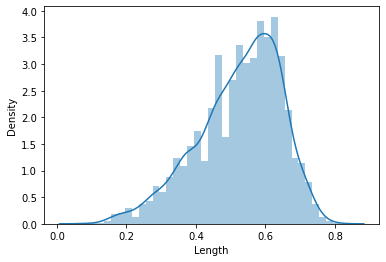

In [18]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

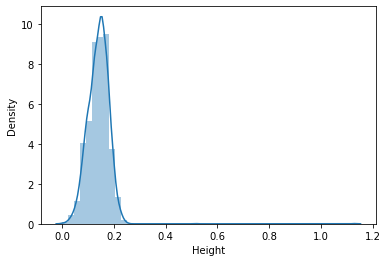

In [19]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

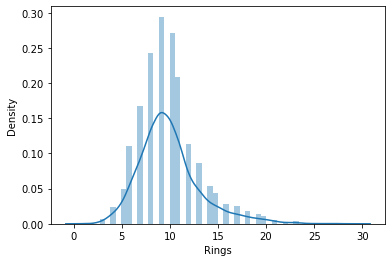

In [20]:
sns.distplot(df['Rings'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

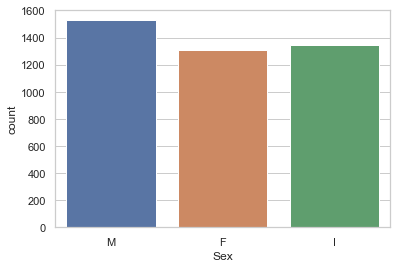

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

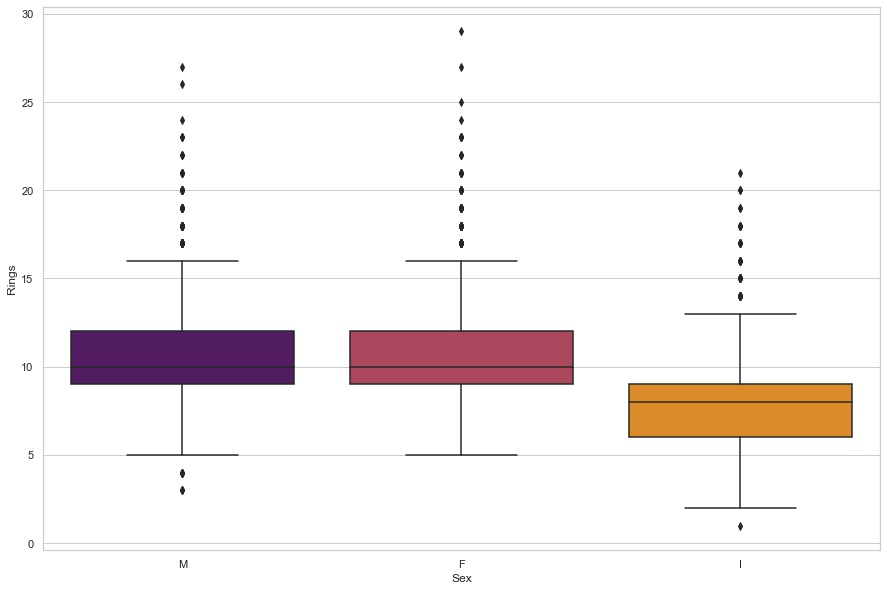

In [26]:
# searching for outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='Sex',y='Rings',data=df,palette='inferno')

In [30]:
print ("\nSex Count in Percentage")
print (df.Sex.value_counts(normalize = True))


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64


In [31]:
print ("\nSex Count in Numbers")
print (df.Sex.value_counts())


Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

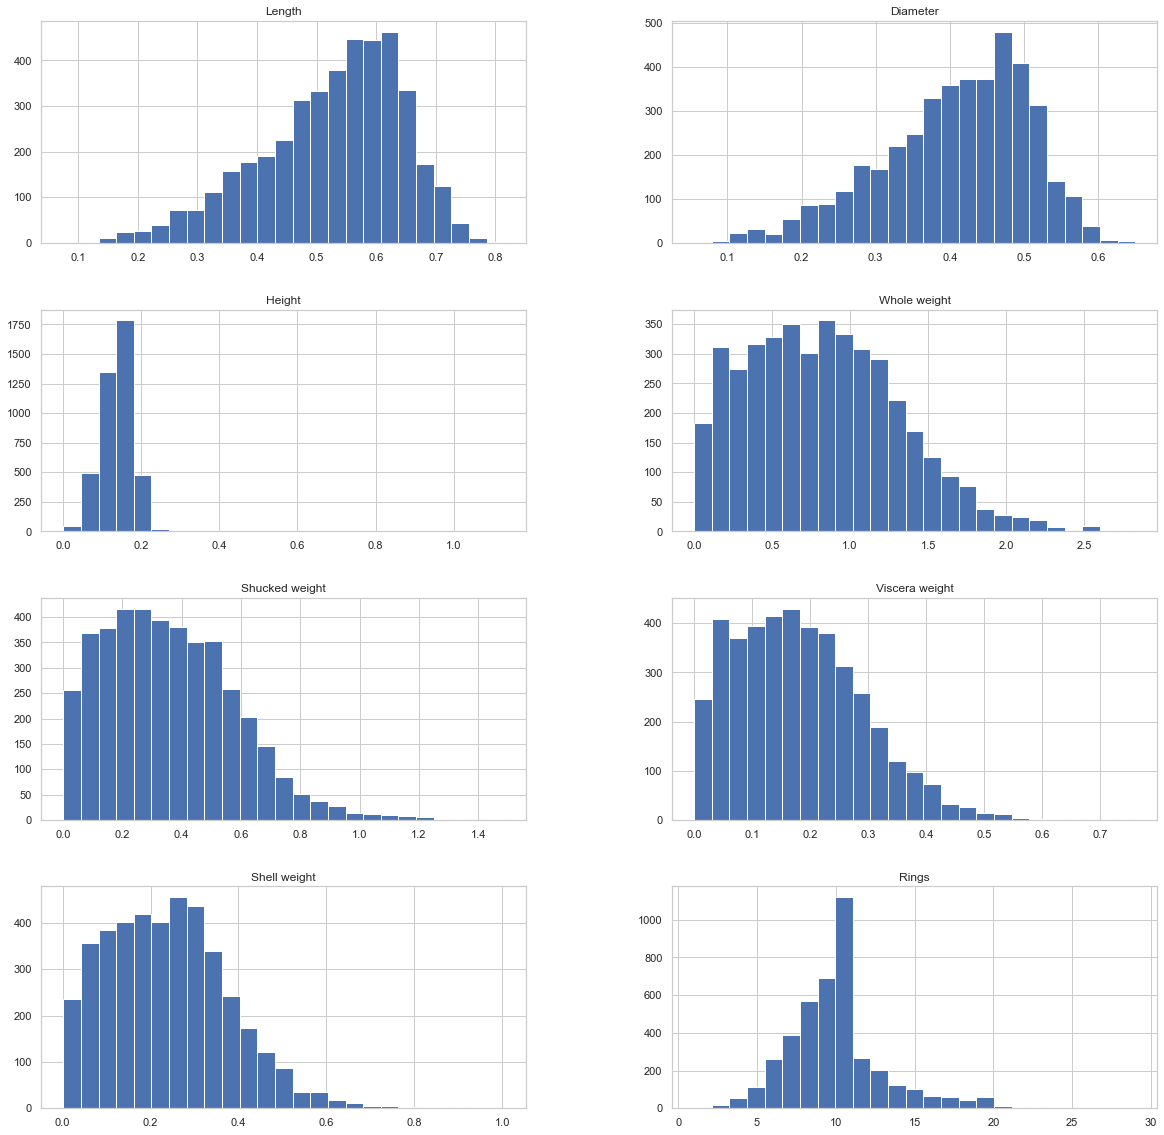

In [43]:
# prepare a histogram 
df.hist(figsize=(20, 20), grid = True, layout = (4,2), bins = 25)

In [44]:
# check skewness
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [50]:
# highest number of rings and respective percentage of rings
print ('Number of rings')
print (df.Rings.value_counts())
print ('Percentage of rings')
print (df.Rings.value_counts(normalize = True))

Number of rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64
Percentage of rings
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
1     0.000239
26    0.000239
29    0.000239
2     0.000239
25    0.000239
Name: Rings, dtype: float64


In [51]:
# No. of classes 
print(len(df.Rings.unique()))

28


In [54]:
# formula for age calculation from rings

df['Age'] = df['Rings'] + 1.5
df['Age'].head(10)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
5     9.5
6    21.5
7    17.5
8    10.5
9    20.5
Name: Age, dtype: float64

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform (df['Sex'])

In [57]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


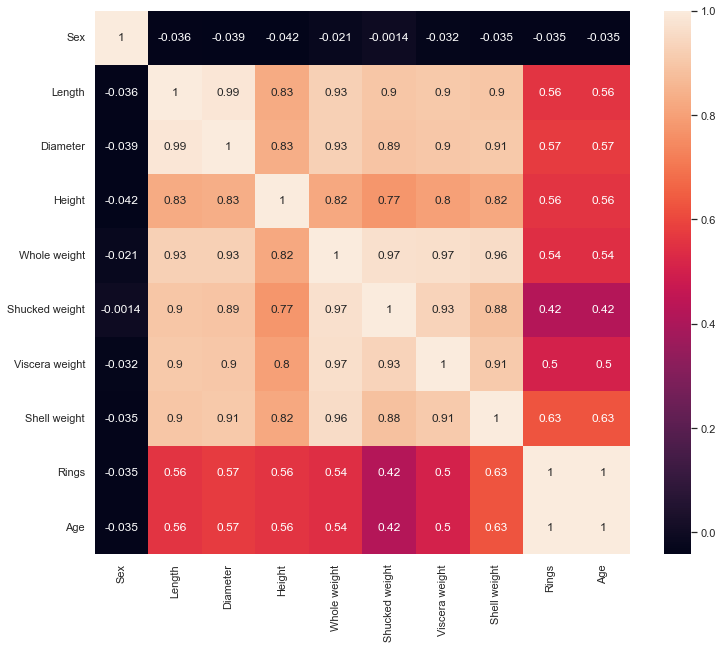

In [62]:
corr_hmap = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr_hmap, annot = True)
plt.show()

In [63]:
#removing outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.151980,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217,1.571544,1.571544
1,1.151980,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987,0.910013,0.910013
2,1.280690,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139,0.289624,0.289624
3,1.151980,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294,0.020571,0.020571
4,0.064355,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757,0.910013,0.910013
...,...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765,0.330765
4173,1.151980,0.549706,0.323686,0.107991,0.279929,0.358808,0.309362,0.155685,0.020571,0.020571
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0.289624,0.289624
4175,1.280690,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571,0.020571


In [64]:
threshold = 3
print(np.where(z>3))

(array([   6,    6,   72,   72,   81,   83,   83,  129,  163,  164,  165,
        165,  165,  166,  166,  166,  167,  167,  168,  170,  181,  181,
        232,  232,  236,  236,  236,  237,  237,  238,  238,  239,  270,
        270,  275,  275,  277,  278,  278,  294,  294,  310,  310,  313,
        313,  314,  314,  334,  351,  351,  355,  355,  358,  358,  362,
        362,  375,  375,  416,  416,  417,  417,  428,  428,  431,  431,
        433,  433,  469,  469,  478,  478,  480,  480,  501,  501,  526,
        526,  530,  530,  572,  572,  628,  628,  673,  673,  674,  674,
        675,  675,  678,  678,  694,  696,  696,  719,  719,  720,  720,
        744,  744,  754,  754,  756,  756,  811,  811,  891,  891,  891,
       1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422,
       1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756, 1757,
       1759, 1761, 1762, 1762, 1762, 1763, 1763, 1

In [72]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [73]:
df = df_new
df.shape

(4027, 10)

# testing & training the model

In [74]:
#Dividing X and y
y = df [['Rings']]
x = df.drop (['Rings'], axis = 1)

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=40)

In [160]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(2818, 9)
(2818, 1)
(1209, 9)
(1209, 1)


In [161]:
lr = LinearRegression()
lr.fit (x_train, y_train)

LinearRegression()

In [162]:
lr.coef_

array([[ 3.61528721e-17,  2.06932889e-15, -1.86418444e-15,
         4.47292952e-16, -2.40877555e-15,  1.42746104e-15,
         2.56333389e-17, -7.80272439e-17,  2.86433499e+00]])

In [163]:
lr.intercept_

array([9.73876335])

In [164]:
lr.score(x_train, y_train)

1.0

In [165]:
from sklearn.linear_model import Lasso,Ridge

In [166]:
ls = Lasso()
ls.fit (x_train, y_train)
ls.score (x_train, y_train)

0.8781360149734537

In [167]:
ls.coef_

array([-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.86442365])

In [168]:
rg = Ridge()
rg.fit (x_train, y_train)
rg.score (x_train, y_train)

0.9999997443312666

In [169]:
rg.coef_

array([[ 3.50362336e-05,  5.13559770e-05,  6.29835784e-04,
         6.01860195e-04,  2.62202038e-03, -2.84830835e-03,
        -5.05668204e-04,  6.28083153e-04,  2.86226391e+00]])

In [170]:
from sklearn.linear_model import ElasticNet

In [171]:
enr = ElasticNet()
enr.fit (x_train, y_train)
enrpred = enr.predict(x_test)
print (enr.score (x_train, y_train))
enr.coef_

0.8106076812122385


array([-0.        ,  0.01784639,  0.05462591,  0.12063265,  0.        ,
        0.        ,  0.        ,  0.13459536,  1.44368693])

In [172]:
print('error :')
print(mean_squared_error(y_test,enrpred))

error :
1.5453363126988395


In [173]:
from sklearn.metrics import r2_score
print(r2_score (y_test, enrpred))

0.811544128839286


In [178]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [179]:
rfr.fit (x_train, y_train)

RandomForestRegressor()

In [175]:
rfr.score(x_train,y_train)

0.9999996799597434

In [187]:
rfr = RandomForestRegressor(n_estimators=300, random_state = 40)

In [188]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=40)

In [189]:
rfr.score(x_train,y_train)

0.999999961556726